<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Labs/Lab05_FixedPt_RootFinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Fixed Point iteration and Rootfinding

There are **two parts** to this lab: fixed point iterations and root-finding with Newton's method. See below for details

#### Learning Objectives
1. Learn how to use and interpret a cobweb plot
1. See that the fixed point iteration doesn't always work
2. Predict which of the fixed point formulations will converge (hint: plot their deriviative)
3. Check your predictions with the cobweb plot
4. See that Newton's method doesn't always work
5. Practice implementing robust methods, e.g., ones that check for convergence, and return useful status flags to the user


Copyright 2025, Department of Applied Mathematics, University of Colorado Boulder. Released under the BSD 3-Clause License

In [1]:
from matplotlib import pyplot as plt

## Part 1: Fixed point iterations (and cobweb plots)

See [cobweb plot on wikipedia](https://en.wikipedia.org/wiki/Cobweb_plot), sometimes called a spider diagram

You can plot these via Python, but to make them nice and interactive is a bit of work (`matplotlib.animation.FuncAnimation` can do it, but you have to be quite proficient with Python and matplotlib).

For this demo, I recommend that you use [this geogebra online cobweb plot](https://www.geogebra.org/m/uvsfvNDt) or one of the varios Desmos apps (e.g., [Logistic Function Cobweb Diagram](https://www.desmos.com/calculator/ktsps2nrhi)) which are quite simple and runs on most modern web browsers.

We'll look at 5 different fixed-point reformulations of the same root-finding problem
$$f(x) = x^3 + 4x^2 - 10, \text{ find } f(x)=0$$
within the interval $[1,2]$

We'll convert it to a fixed point equation $$g(x)=x$$ for:
$$\begin{aligned}
g_1(x) &= x - x^3 - 4x^2+10\\\\
g_2(x) &= \sqrt{\frac{10}{x}-4x}\\\\
g_3(x) &= \frac{1}{2}\sqrt{10-x^3}\\\\
g_4(x) &= \sqrt{\frac{10}{4+x}}\\\\
g_5(x) &= x - \frac{x^3+4x^2-10}{3x^2+8x}
\end{aligned}
$$
If we know that the root is positive, then all of these $g$ functions should have a fixed point at a root of $f$ (you can double-check this yourself!)

These are in the Burden and Faires book in Table 2.2.

### Task
1. First, run a standard root-finding method from scipy (e.g., `scipy.optimize.root_scalar`) to find the value of the root in $[1,2]$
2. Then, for each of the five variations,
    - convince yourself via algebraic manipulations that the fixed-point problem is equivalent to the root-finding problem
    - plot the fixed-point problem, i.e., $y=g_i(x)$ and $y=x$, and confirm visually that it looks like it has the same solution as the root-finding problem
    - find the max and min value of the derivative, $g'_i$, over the interval $[1,2]$. This can be done either by hand or by graphing
    - check if $g_i$ maps $[1,2]$ into $[1,2]$. This can be done either by hand or by graphing
    - using the cobweb plotting software of your choice, run the fixed point iteration for each variation, trying it for starting points of both $x_0=1$ and $x_0=2$.  Does it converge? Diverge? Cycle?

### Deliverables
Your PDF should have an image (a screenshot is fine) of the cobweb plot for one case where it diverges, and one case where it converges. Make sure it is clearly labeled which example and what starting point.

In [2]:
import numpy as np
from scipy.optimize import root_scalar

# ... todo ...
# 1. Find a root of f using root_scalar or something else standard
# 2a. Check that x = g_i(x) is the same as f(x)=0 for each i
# 2b. Plot g_i(x) for each i, confirm part 2a visually
# 2c. Find the max and min of g_i' over the interval [1,2]
# 2d. Check if g_1 maps [1,2] into [1,2]
# 2e. Run a cobweb plot for two initial conditions, for each i   (this can be done externally, just take screenshots)

## Part 2: Breaking Newton's Method

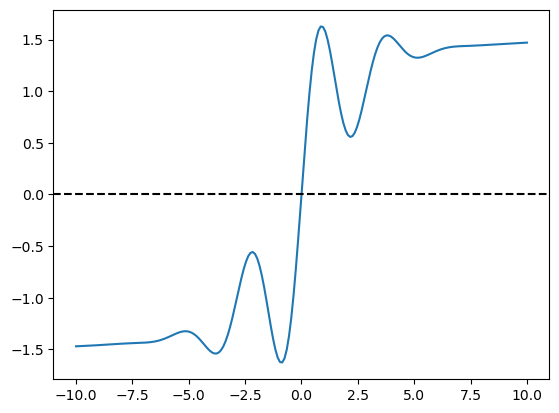

In [3]:
import jax.numpy as jnp
from jax import grad
from jax import config
config.update("jax_enable_x64", True)
from scipy.special import lambertw as W

f = lambda x : jnp.arctan(x) + jnp.exp(-x**2/10)*jnp.sin(2*x)

xGrid = jnp.linspace(-10,10,200)
plt.plot( xGrid, f(xGrid), '-' )
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

### Task
1. Implement Newton's method
    - I've made a skeleton of some code for you below. Fill this in to implement Newton's method.
    - We'll use JAX to do automatic differentiation for us, so you don't even need to supply the derivative! But this does mean that your function must be defined using JAX functions (i.e., use `import jax.numpy as jnp` and then use `jnp...` instead of `np...`)
    - Make sure you have a **stopping condition**, and detect when the method **diverges**.  Return a useful **error message** that the user can look at.
    - Make sure your method works by running it on some root-finding problems where we know the answer.
2. For the function $f(x)=\arctan(x) + e^{-x^2/10}\sin(2x)$, which is plotted above, we want to find the root using Newton's method (spoiler alert: the root is $x=0$).
    - First, using the plot, visually draw out the first few iterations of Newton's method for a few different starting points.
    - Now, systematically test whether Newton's method converges for different starting points $x_0$. Choose a grid of $x_0$ locations consisting of 100 equally spaced points between $[-10,10]$ and for each $x_0$, run your Newton method code and see if it converges.  Check your error flag from your code!

### Deliverable
You should turn in a plot that shows for which starting points $x_0$ Newton's method converges (i.e., plot a $1$ at $x_0$ if it converged, and a $0$ if it failed to converge or diverged).

### Task 1

In [ ]:
import jax.numpy as jnp
from jax import grad
from jax import config
config.update("jax_enable_x64", True)
from scipy.special import lambertw as W

# First, convince yourself that code and algorithm are working
# by running the code on some problems where we can check our answer

# Very simple class, basically just a structure
class testProblem:
    def __init__(self, f, trueAnswer, name=None ):
        self.f = f
        self.trueAnswer = trueAnswer
        self.name = name

testProblemSuite = []

# One test problem
x = 15
f = lambda y : y*jnp.exp(y) - x
trueAnswer = jnp.real(W(x))
testProblemSuite.append( testProblem(f,trueAnswer,'Lambert W function') )

# Another test problem
# Let's figure out the square root of 13
f = lambda y : y**2 - 13
trueAnswer = jnp.sqrt(13)
testProblemSuite.append( testProblem(f,trueAnswer,'Square root of 13') )


def Newton(f,x0,fprime=None,maxSteps=100,tol = 1e-15):
    """ Newton method to solve f(x)=0, where fprime is the derivative
    of f. If fprime is not supplied, then the code will use JAX's
    Automatic Differentiation to automatically compute it.
    Starts Newton's method at the initial guess of x0. """
    # I added a few things in the function signature that you want
    # You are free to add more things
    # (e.g., a flag that controls where you print information out every iteration or not...
    #  That's often nice to see, but you may want to be able to turn it off in case
    #  it gets annoying )


    if fprime is None:
        fprime = grad(f) # use JAX's autodiff
    x = jnp.array(x0,dtype=jnp.float64) # if it's an integer, convert to float

    # ... TODO ... you implement the rest

    # ...
    status = 'Code is not implemented yet!!'

    return x, status

for test in testProblemSuite:
    f          = test.f
    trueAnswer = test.trueAnswer
    print(f'=== Problem: {test.name}   ===')
    fprime = grad(f)
    x, status = Newton(f,.99,fprime)
    print(status)
    print(x)
    print(trueAnswer)

=== Problem: Lambert W function   ===
Code is not implemented yet!!
0.99
2.0099435593505657
=== Problem: Square root of 13   ===
Code is not implemented yet!!
0.99
3.605551275463989


### Task 2
Now that you've implemented Newton's method and have some faith that it works correctly, let's apply it to the function in question $f(x)=\arctan(x) + e^{-x^2/10}\sin(2x)$

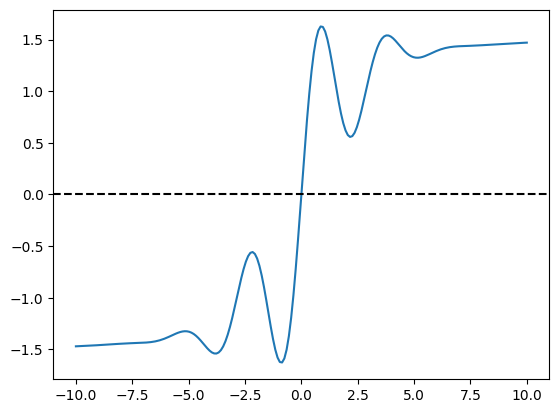

In [ ]:
# A quick plot of the function in question
f = lambda x : jnp.arctan(x) + jnp.exp(-x**2/10)*jnp.sin(2*x)

xGrid = jnp.linspace(-10,10,200)
plt.plot( xGrid, f(xGrid), '-' )
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [ ]:
# To start with, if you have x0 very close to the true root (which is 0), does your code work?
# And conversely, if x0 is very far away, does it fail? Can you detect that it fails?
#    Draw out the approximations that Newton's method makes -- does that help explain it?

Now a systematic test: for which starting values $x_0$ does Newton's method converge?

In [ ]:
m = 100
x0grid = jnp.linspace(-10,10,m)
success = []
for x0 in x0grid:
    x, status = Newton(f,x0, ...anything-else-you-need-to-pass-in )
    success.append( status=='converged' ) # ... or something like this

In [ ]:
# And make a plot for the deliverable
plt.plot( x0grid, success )
plt.title("Success of Newton's method as a function of starting point")
plt.xlabel("Starting point $x_0$")
plt.ylabel("1=success, 0=failure")
plt.show()